Logistic regression : It is a supervised machine learning algorithm used for binary classification 
The goal is to predict the probability of categorical value outcome that have two probability 0 r 1

Application :
->Image classification 
->Medical dignosis
->Finance fraud detection
->spam mail detection 
->marketing

Advantages :
->simplicity easy to implement 
->Efficiency : quick computation 
-> Scales to large dataset 
->Probabilistic outcome

Disdvantages :
->linear Decision Boundary it may not perform well if the relationship is not linear
->sensitive outlier
->overfitting with high dimentationality

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


Reading the file 

In [2]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(149, 5)

In [11]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


Data Visualization

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

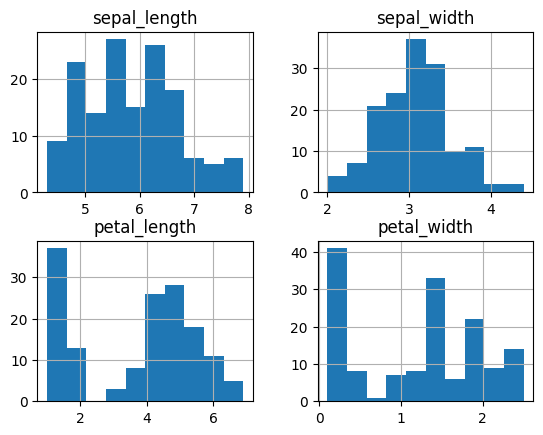

In [12]:
data.hist()

<Axes: xlabel='species', ylabel='count'>

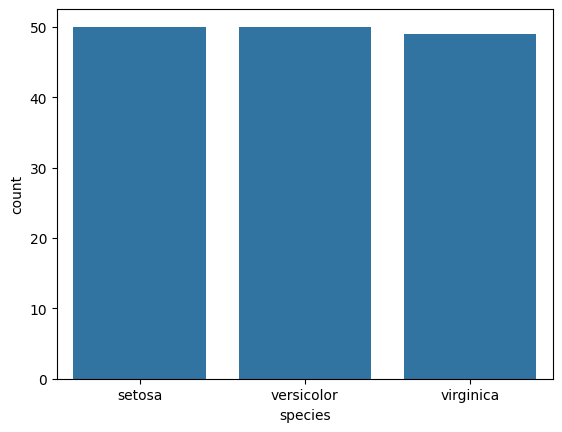

In [13]:
sns.countplot(x='species',data=data)

<Axes: >

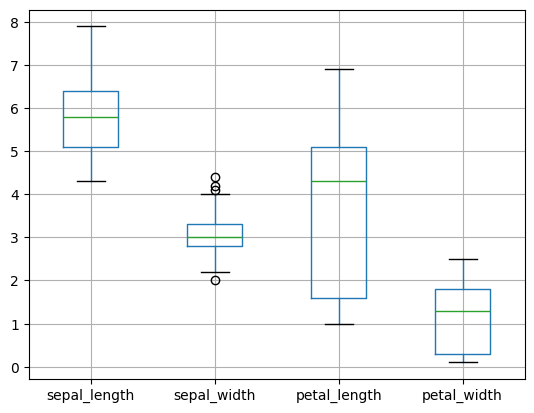

In [14]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x18d79f6ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x18d79da27d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d79f6a210>],
 'medians': [<matplotlib.lines.Line2D at 0x18d79f79990>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d79f7a3d0>],
 'means': []}

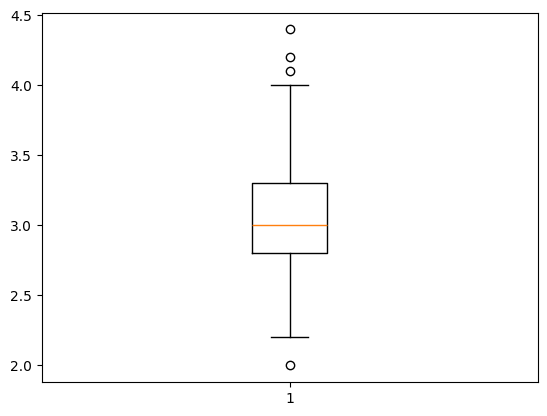

In [15]:
plt.boxplot(data['sepal_width'])

In [16]:
data['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 149, dtype: float64

In [17]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())


petal_length    0
petal_width     0
sepal_length    0
sepal_width     4
species         0
dtype: int64


In [18]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


{'whiskers': [<matplotlib.lines.Line2D at 0x18d79fcf390>,
 'caps': [<matplotlib.lines.Line2D at 0x18d79fdccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d79fce850>],
 'medians': [<matplotlib.lines.Line2D at 0x18d79fde350>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d79fdee50>],
 'means': []}

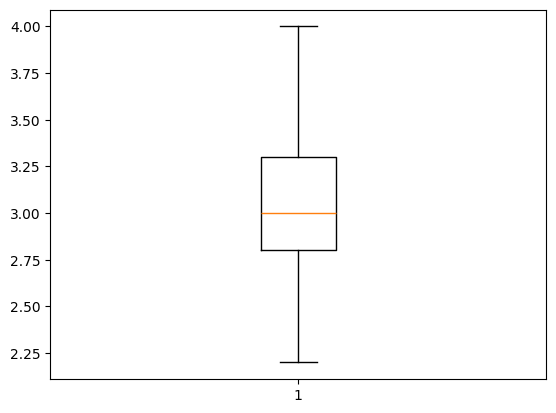

In [19]:
plt.boxplot(data['sepal_width'])

<Axes: >

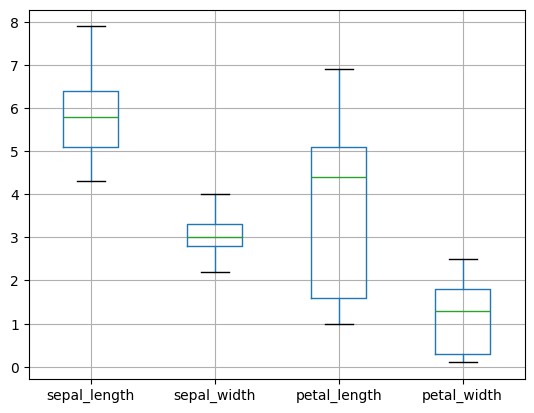

In [20]:
data.boxplot()

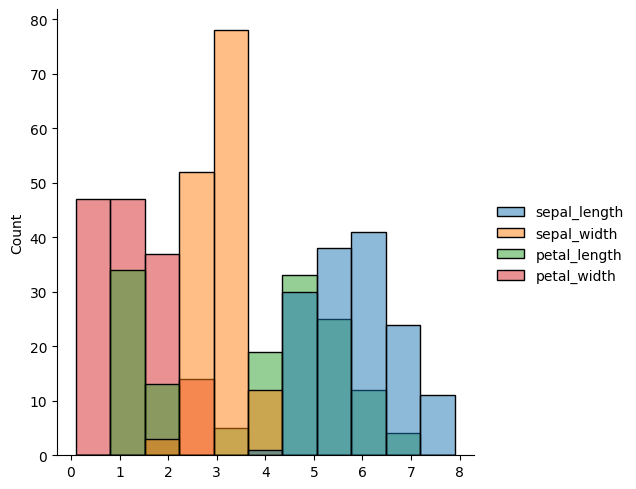

In [21]:
sns.displot(data)

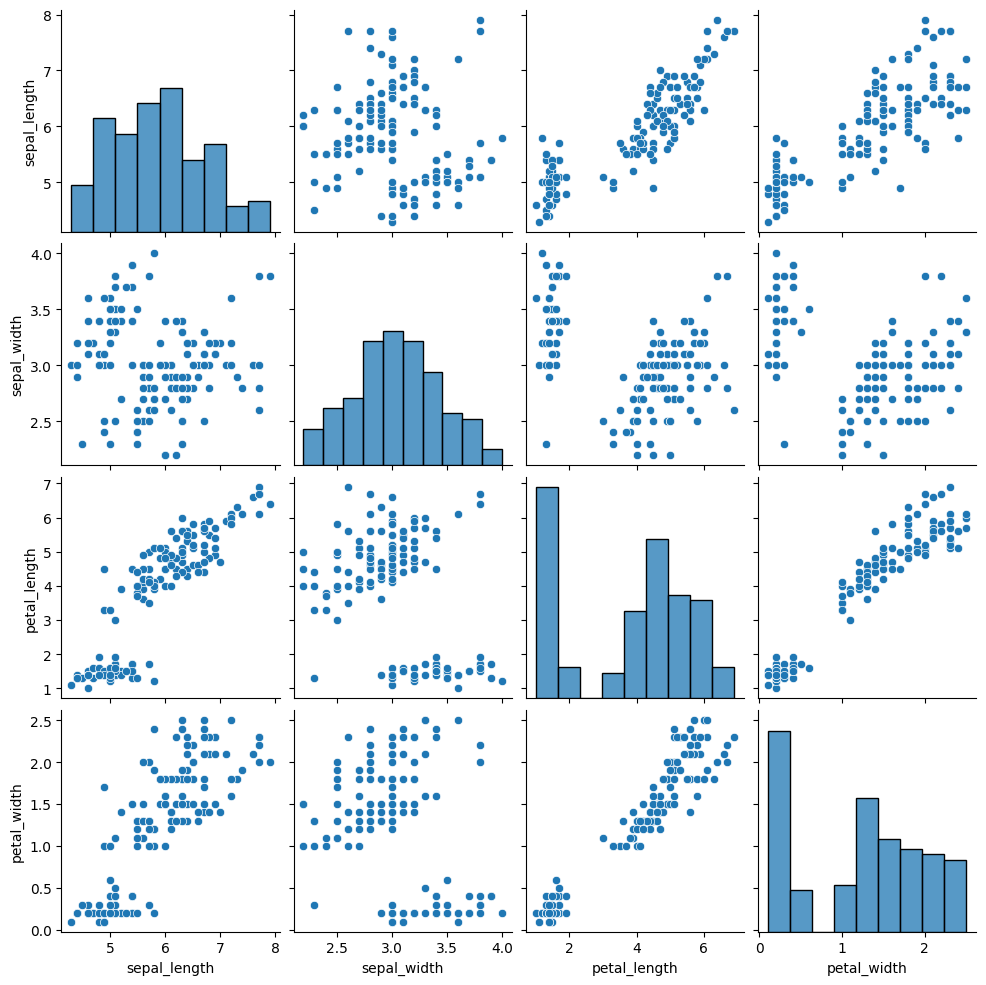

In [22]:
sns.pairplot(data)

<Axes: >

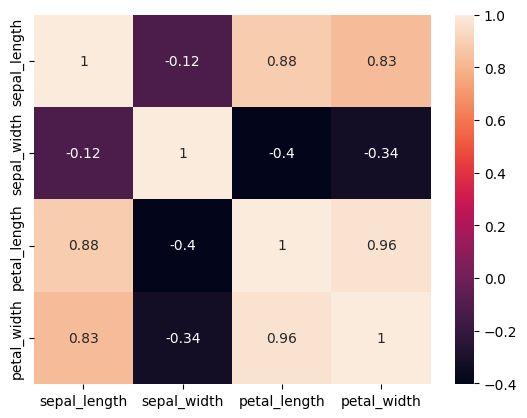

In [23]:
sns.heatmap(data.corr(),annot=True)

Data Encoding : Categorical to numerical

In [24]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
label=LabelEncoder()
data['species']=label.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
data=data[data['species']!=2]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


splitting the data

In [27]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

(    sepal_length  sepal_width  petal_length  petal_width
 0            5.1          3.5           1.4          0.2
 1            4.9          3.0           1.4          0.2
 2            4.7          3.2           1.3          0.2
 3            4.6          3.1           1.5          0.2
 4            5.0          3.6           1.4          0.2
 ..           ...          ...           ...          ...
 95           5.7          3.0           4.2          1.2
 96           5.7          2.9           4.2          1.3
 97           6.2          2.9           4.3          1.3
 98           5.1          2.5           3.0          1.1
 99           5.7          2.8           4.1          1.3
 
 [96 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 95    1
 96    1
 97    1
 98    1
 99    1
 Name: species, Length: 96, dtype: int32)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((76, 4), (76,), (20, 4), (20,))

Model Building :

In [31]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [33]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [34]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

Model Evaluation

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
print(accuracy_score(y_pred,y_test))

1.0


In [37]:
print(confusion_matrix(y_test,y_pred))

[[11  0]
 [ 0  9]]


Hyper parameter Tunning

In [38]:
parameters={'penalty':('l1','l2','elastic',None),'C':[1,10]}
clf=GridSearchCV(clf,param_grid=parameters,cv=5)
clf.fit(x_train,y_train) # spliting of the train to validation data

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elastic', None)})

In [39]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [40]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [42]:
print(accuracy_score(y_pred,y_test))

1.0


In [43]:
print(confusion_matrix(y_pred,y_test))

[[11  0]
 [ 0  9]]


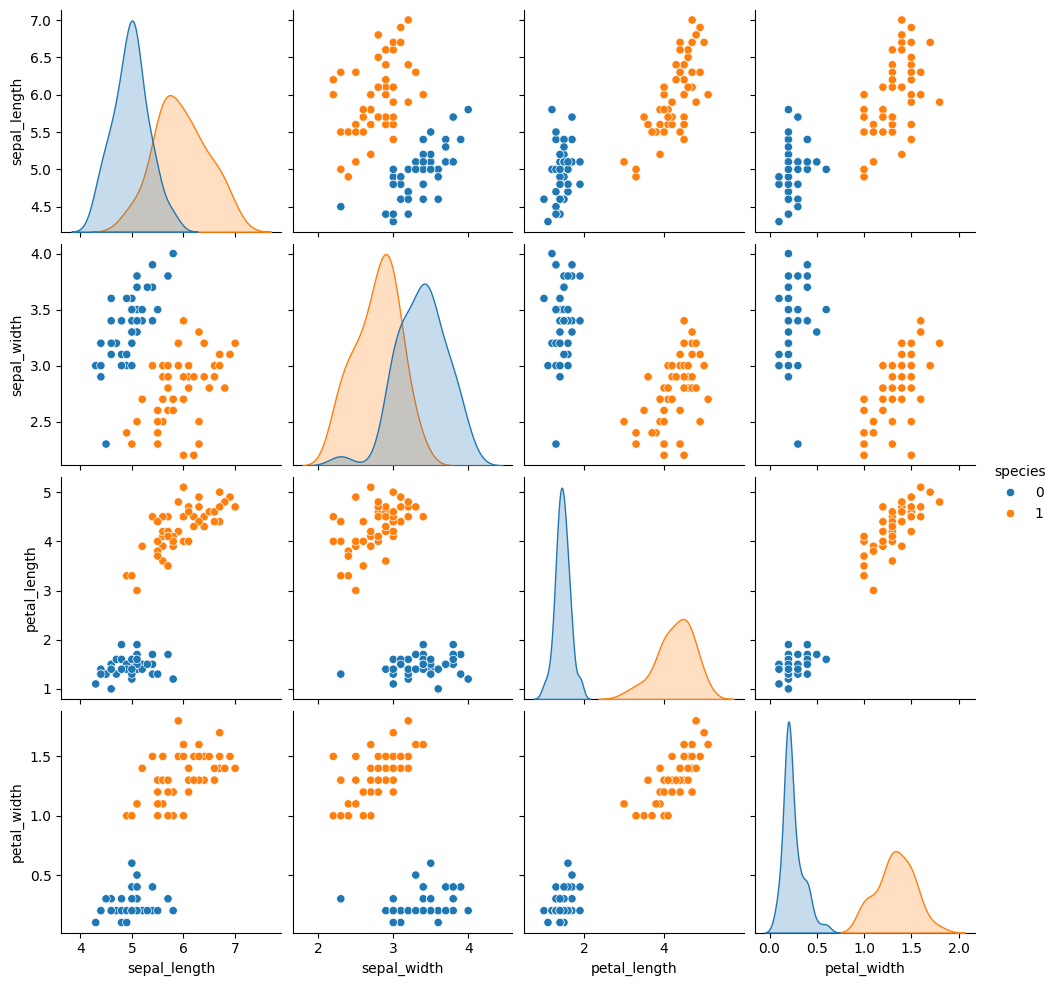

In [44]:
sns.pairplot(data,hue='species')